In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt
import random
%matplotlib inline
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Traemos nuestros datos:

In [5]:
#Recuerda que la direccion de los archivos puede variar.
train_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Csves/train_labels.csv', encoding='latin-1')
train_values = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Csves/train_values.csv', encoding='latin-1')

In [6]:
join = train_values.merge(train_labels)

In [7]:
materials_with_building_id=np.array(['building_id','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                                     'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                                     'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other'])

In [8]:
materials=np.array(['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone',\
                          'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',\
                          'has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',\
                          'has_superstructure_rc_engineered','has_superstructure_other'])

In [9]:
uses=np.array(['has_secondary_use_agriculture','has_secondary_use_hotel',\
                          'has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school',\
                          'has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police'])

In [10]:
uses_with_building=np.array(['building_id','has_secondary_use_agriculture','has_secondary_use_hotel',\
                          'has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school',\
                          'has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police'])

In [11]:
magic=np.array([[0, 0.6, 0.9, 1], [1, 1.3/2.25, 0.0, 1], [0.8/2, 1.5/2, 0.6/2, 1]])

# Como estan compuestos nuestros datos:

## *Muestra de train_labels.csv*

In [12]:
train_labels.shape

(260601, 2)

In [13]:
train_labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [14]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


¿El dataset tiene agujeros? Se trata de ver la cantidad de null que posee el DataSet

In [15]:
train_labels.isnull().sum()

building_id     0
damage_grade    0
dtype: int64

Modifico los el tamaño de los ints a uno mas acorde al rango trabajado.

In [16]:
train_labels = train_labels.astype({'building_id':'int32','damage_grade':'int8'})

In [17]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int32
 1   damage_grade  260601 non-null  int8 
dtypes: int32(1), int8(1)
memory usage: 1.2 MB


¿El dataset tiene dos building_id iguales? Con el objetivo de poder ver si existen edificios con ids repetidos, para su posterior analisis.

In [18]:
train_labels.building_id.value_counts().max()

1

## *Muestra de train_values.csv*

In [19]:
train_values.shape

(260601, 39)

In [20]:
train_values.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

¿El dataset tiene agujeros?

In [22]:
train_values.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

¿El dataset tiene dos building_id iguales?

In [23]:
train_values.building_id.value_counts().max()

1

## Adaptacion de tipos del dataset train_values

Anterior mente cuando vimos la composicion del dataset, vimos que se contaba con 8 columnas de tipo 'Object' que podrian ser convertidas a tipo 'Category' para mejorar el uso memoria.

### Esas columnas eran:

In [24]:
train_values.land_surface_condition.value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [25]:
train_values.foundation_type.value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [26]:
train_values.roof_type.value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [27]:
train_values.ground_floor_type.value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [28]:
train_values.other_floor_type.value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [29]:
train_values.position.value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

In [30]:
train_values.plan_configuration.value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [31]:
train_values.legal_ownership_status.value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

### Conversion de columnas 'Object' a 'Category'

In [32]:
train_values = train_values.astype({'land_surface_condition':'category', 'foundation_type':'category',\
                                    'roof_type':'category', 'ground_floor_type':'category',\
                                    'other_floor_type':'category', 'position':'category',\
                                    'plan_configuration':'category', 'legal_ownership_status':'category'
                                    })

In [33]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

### Columnas int64

Tambien observamos columnas de tipo int64, tipo de dato que permite un gran rango de numeros y estaban sobredimensionadas para lo que se buscaba representar.

In [34]:
train_values.building_id.max()

1052934

In [35]:
train_values.geo_level_1_id.max()

30

In [36]:
train_values.geo_level_2_id.max()

1427

In [37]:
train_values.geo_level_3_id.max()

12567

In [38]:
train_values.count_floors_pre_eq.max()

9

In [39]:
train_values.age.max()

995

In [40]:
train_values.area_percentage.max()

100

In [41]:
train_values.height_percentage.max()

32

In [42]:
train_values.count_families.max()

9

### Cambio de tipo de dato de las columnas int64

Una vez visto el numero maximo que se buscaba representar, se paso a darle un tipo de dato mas cercano al rango de numeros que contenian.

In [43]:
train_values = train_values.astype({'building_id':'int32','geo_level_1_id':'int8',\
                                   'geo_level_2_id':'int16','geo_level_3_id':'int16',\
                                   'count_floors_pre_eq':'int8','age':'int16',\
                                   'area_percentage':'int8','height_percentage':'int8',\
                                   'count_families':'int8','has_secondary_use':'int8',\
                                    'has_secondary_use_agriculture':'int8','has_secondary_use_hotel':'int8',\
                                    'has_secondary_use_school':'int8','has_secondary_use_industry':'int8',\
                                    'has_secondary_use_health_post':'int8','has_secondary_use_gov_office':'int8',\
                                    'has_secondary_use_use_police':'int8','has_secondary_use_other':'int8',\
                                    'has_secondary_use_rental':'int8','has_secondary_use_institution':'int8',\
                                    'has_superstructure_adobe_mud':'int8','has_superstructure_mud_mortar_stone':'int8',\
                                    'has_superstructure_stone_flag':'int8','has_superstructure_cement_mortar_stone':'int8',\
                                    'has_superstructure_timber':'int8','has_superstructure_bamboo':'int8',\
                                    'has_superstructure_rc_non_engineered':'int8','has_superstructure_rc_engineered':'int8',\
                                    'has_superstructure_other':'int8','has_superstructure_mud_mortar_brick':'int8',\
                                    'has_superstructure_cement_mortar_brick':'int8'
                                    })

In [44]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

### ¿Que se gano con las conversiones?

El tamaño del dataset paso de 77,5 MB aprox. a 11,2 MB aprox., lo cual seria una diferencia de 66,3 MB, lo cual equivale a una reduccion del 85% aprox. en el
tamaño del dataset.

# Funciones usadas

In [45]:
def Analisis_Building_id_normalized(columna_analizar):
  
      array=np.array(["damage_grade","building_id",columna_analizar]) 
      join_array=join[array]
      join_array=join_array.groupby(["damage_grade",columna_analizar])['building_id'].count()
      join_array_cant=join_array.copy().reset_index()[array]
      join_array_cant=join_array_cant.pivot_table(index=columna_analizar,columns="damage_grade",values="building_id").fillna(0)
      join_array_cant=normalizarDamage(join_array_cant)
      ploteo_general=join_array_cant.plot.bar(figsize=(13,11),width=0.75)
      return ploteo_general

In [46]:
def normalizarDamage(df1):
      df1['suma']= df1[1]+ df1[2]+ df1[3]
      df1[1]=df1[1]/df1['suma']
      df1[2]=df1[2]/df1['suma']
      df1[3]=df1[3]/df1['suma']
      df1.drop(columns='suma',inplace=True)
      return df1

# Analisis de eventos

## Cantidad de edificios segun grado de daño

Se realizo este analisis con el objetivo de ver la distribución entre Cantidad de Edificios y el Grado de daño, y tambien para un posterior uso.

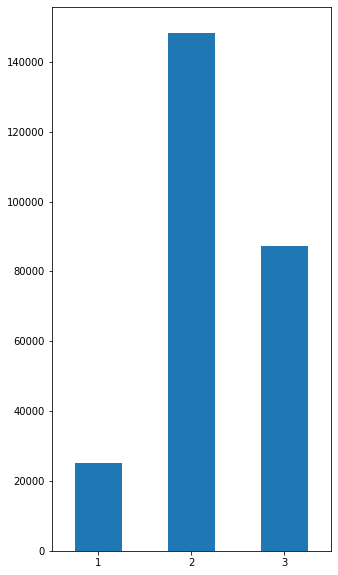

In [47]:
train_labels['damage_grade'].value_counts().sort_index().plot.bar(figsize=(5,10), rot=0)

## Correlacion damage_grade/age

Se hace este analisis para corroborar la hipotesis de que el tipo de daño estaria condicionado con la antiguedad que posee cada edificio afectado.

In [48]:
df_checkout = join[join['damage_grade']==1].groupby(['age'])['damage_grade'].count().sort_index()
largo=df_checkout.index.size
labels =df_checkout.index
angles = [i / float(largo) * 2 * pi for i in range(largo)]
angles += angles[:1]

red='#FF2D00'
yellow = '#F0FF00'
green = '#1BFF00'
black = '#000000'

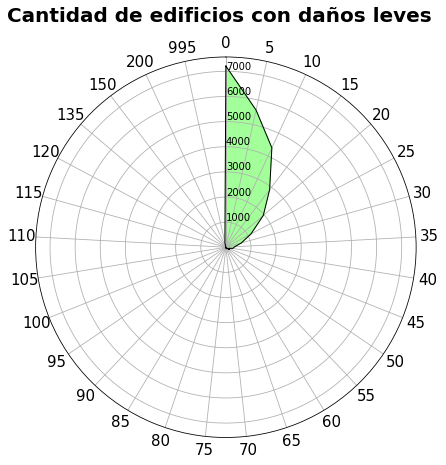

In [49]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Cantidad de edificios con daños leves', fontsize=20,fontweight='bold')
series = plt.subplot(1, 1, 1, polar=True) 
series.set_theta_offset(pi / 2)
series.set_theta_direction(-1)
plt.xticks(angles, labels, color=black, size=15)

series_values = df_checkout.values.flatten().tolist()
series_values += series_values[:1]  

series.set_rlabel_position(0)
series.plot(angles, series_values, color=black, linewidth=1)
series.fill(angles, series_values, color=green, alpha=0.4)
#series.set_title('Cantidad de edificios con daños leves', y=1)

In [50]:
df_checkout = join[join['damage_grade']==2].groupby(['age'])['damage_grade'].count().sort_index()
largo=df_checkout.index.size
labels =df_checkout.index
angles = [i / float(largo) * 2 * pi for i in range(largo)]
angles += angles[:1] 

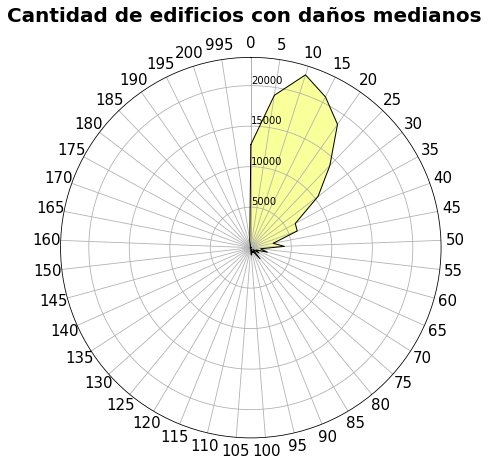

In [51]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Cantidad de edificios con daños medianos', fontsize=20,fontweight='bold')
series = plt.subplot(1, 1, 1, polar=True)  
series.set_theta_offset(pi / 2)
series.set_theta_direction(-1)


plt.xticks(angles, labels, color=black, size=15)

series_values = df_checkout.values.flatten().tolist()
series_values += series_values[:1]  

series.set_rlabel_position(0)
series.plot(angles, series_values, color=black, linewidth=1)
series.fill(angles, series_values, color=yellow, alpha=0.4)
#series.set_title('Cantidad de edificios con daños medianos', y=1)

In [52]:
df_checkout = join[join['damage_grade']==3].groupby(['age'])['damage_grade'].count().sort_index()
largo=df_checkout.index.size
labels =df_checkout.index
angles = [i / float(largo) * 2 * pi for i in range(largo)]
angles += angles[:1] 

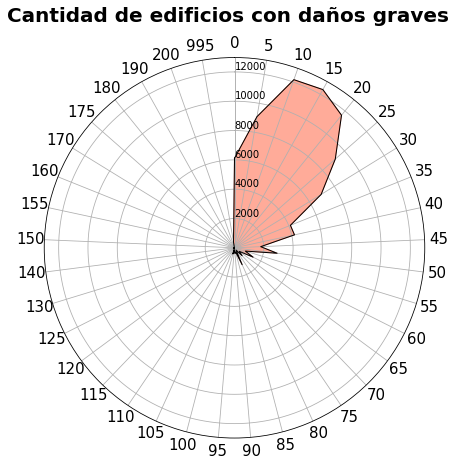

In [53]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Cantidad de edificios con daños graves', fontsize=20,fontweight='bold')
series = plt.subplot(1, 1, 1, polar=True)  
series.set_theta_offset(pi / 2)
series.set_theta_direction(-1)
plt.xticks(angles, labels, color=black, size=15)

series_values = df_checkout.values.flatten().tolist()
series_values += series_values[:1]  

series.set_rlabel_position(0)
series.plot(angles, series_values, color=black, linestyle='solid', linewidth=1)
series.fill(angles, series_values, color=red, alpha=0.4)
#series.set_title('Cantidad de edificios con daños graves', y=1)

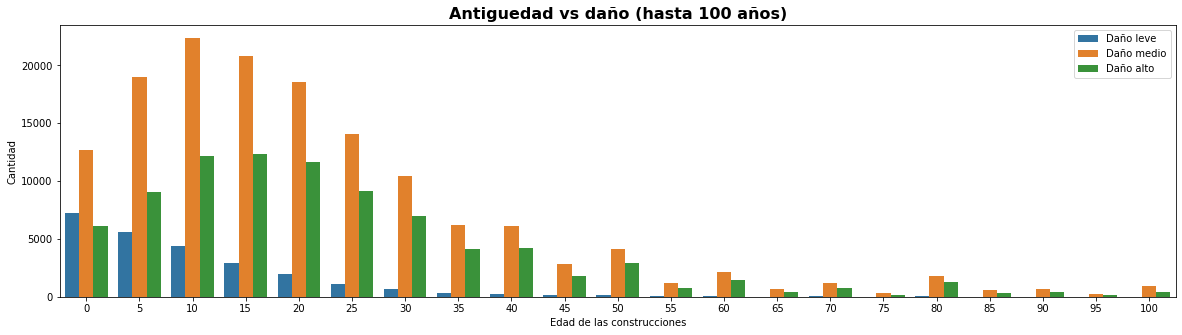

In [54]:
aux = join[join['age'] < 101]

plt.figure(figsize=(20,5))
sns.countplot(x=aux['age'],hue=aux['damage_grade'])
plt.title("Antiguedad vs daño (hasta 100 años)",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Edad de las construcciones")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

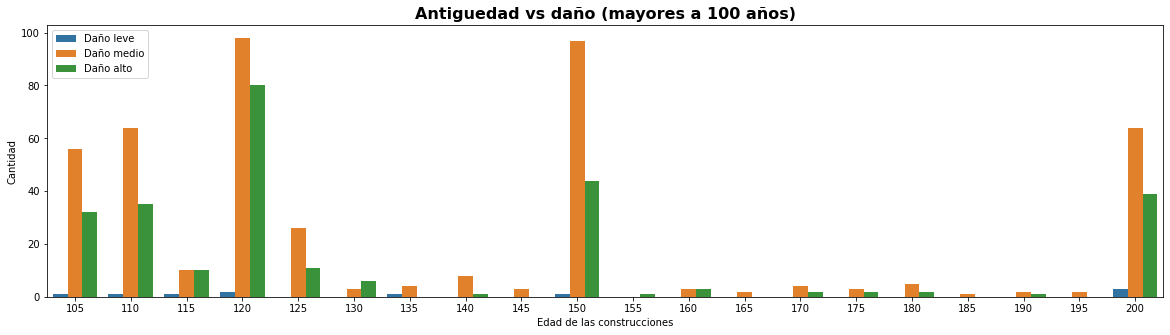

In [55]:
aux = join[(join['age'] > 101) & (join['age'] < 995)]

plt.figure(figsize=(20,5))
sns.countplot(x=aux['age'],hue=aux['damage_grade'])
plt.title("Antiguedad vs daño (mayores a 100 años)",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Edad de las construcciones")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

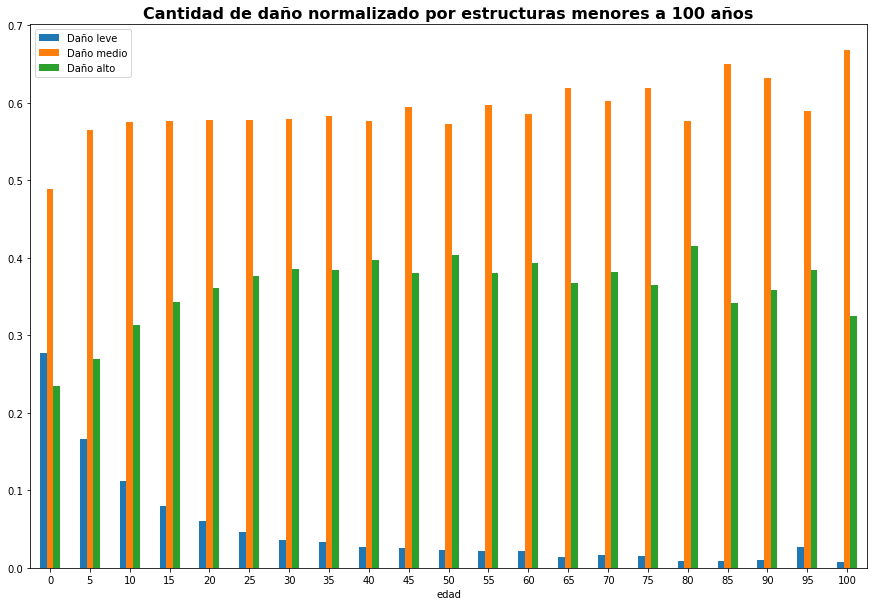

In [56]:
plot = normalizarDamage(join[join['age']<101][['age','damage_grade','building_id']].groupby(['damage_grade','age'])\
                 .count().pivot_table(index='age',columns="damage_grade",values="building_id").fillna(0))\
                 .plot(kind='bar',title='Cantidad de daño normalizado por estructuras menores a 100 años',figsize=(15,10), rot=0, xlabel='edad')
plt.title('Cantidad de daño normalizado por estructuras menores a 100 años',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

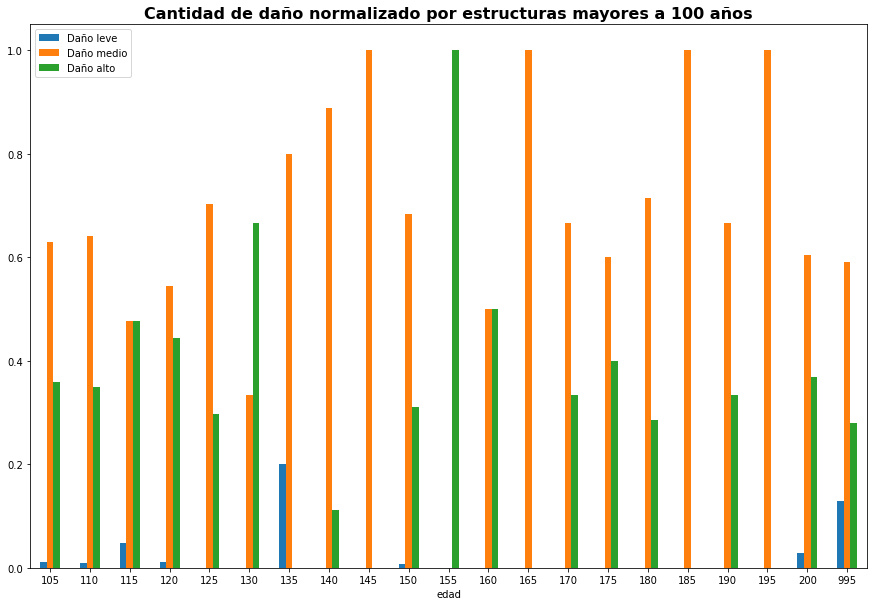

In [57]:
plot = normalizarDamage(join[join['age']>101][['age','damage_grade','building_id']].groupby(['damage_grade','age'])\
                 .count().pivot_table(index='age',columns="damage_grade",values="building_id").fillna(0))\
                 .plot(kind='bar',title='Cantidad de daño normalizado por estructuras mayores a 100 años',figsize=(15,10), rot=0, xlabel='edad')
plt.title('Cantidad de daño normalizado por estructuras mayores a 100 años',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## Correlacion damage_grade/cantidad_pisos

Este analisis se hace, partiendo de la hipotesis de que cuanto mayor cantidad de pisos posee el edificio, el grado de daño va en correlación.

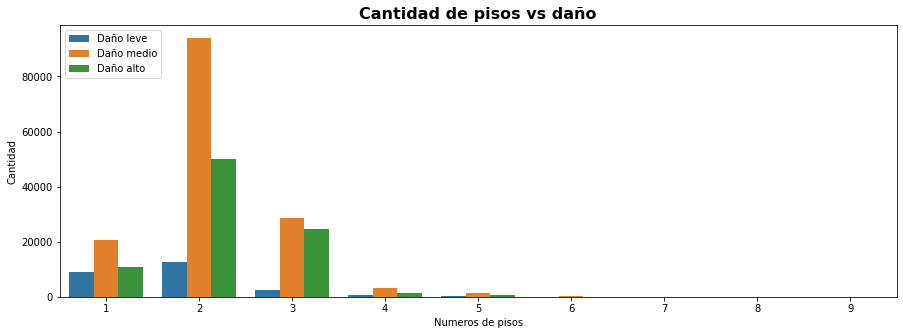

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x=join['count_floors_pre_eq'],hue=join['damage_grade'])
plt.title("Cantidad de pisos vs daño",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Numeros de pisos")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

Aclaracion: Solo hay un edificio de 9 pisos y uno de 8. 

Text(0.5, 1.0, 'Daño normalizado vs cantidad de pisos')

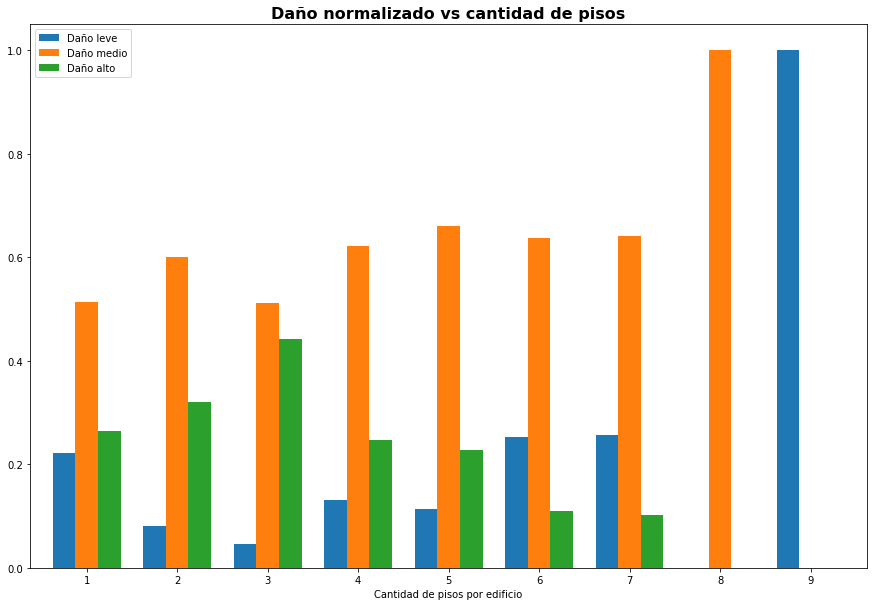

In [59]:
plot = normalizarDamage(join.groupby(['damage_grade','count_floors_pre_eq']).count()\
                        .pivot_table(index='count_floors_pre_eq',columns="damage_grade",values="building_id").fillna(0)).\
                        plot(kind='bar',title='Daño normalizado vs cantidad de pisos',figsize=(15,10),width=0.75, rot=0, xlabel='Cantidad de pisos por edificio')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])
plt.title("Daño normalizado vs cantidad de pisos",fontsize=16,fontweight='bold')

## Tipo de edificio y daño


Se hace este analisis, suponiendo que el grado de daño estaria condicionado, por el tipo de eso el cual se le dio a cada uno de ellos y dependiendo de eso el grado sera mayor o menor.

Text(0.5, 1.0, 'Uso de edificios vs daño recibido')

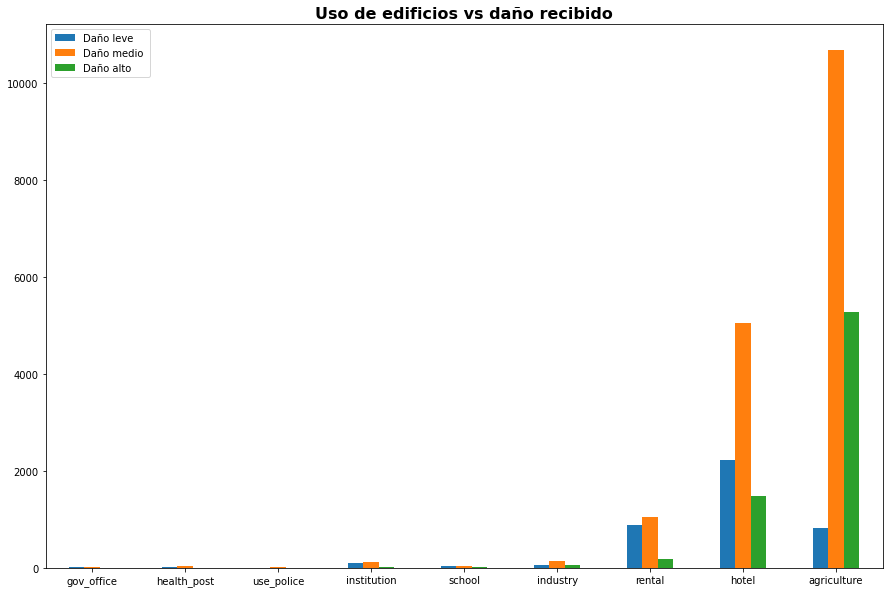

In [60]:
df = train_values[uses_with_building].merge(train_labels).groupby(['damage_grade'])[uses].sum().T.sort_values(3)
df.index = ['gov_office', 'health_post','use_police', 'institution','school', 'industry','rental', 'hotel','agriculture']
df.plot(kind='bar',title='Uso de edificios vs daño recibido', figsize=(15,10), rot=0)
plt.legend(['Daño leve','Daño medio ','Daño alto'])

plt.title("Uso de edificios vs daño recibido",fontsize=16,fontweight='bold')

Text(0.5, 1.0, 'Uso de edificio vs daño normalizado')

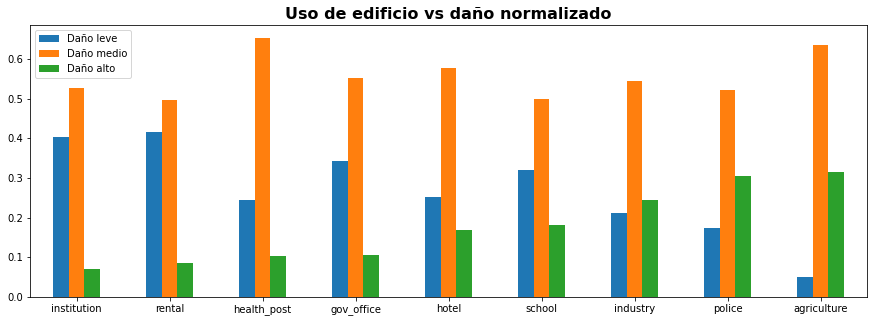

In [61]:
df_tipos_normalizados=normalizarDamage(train_values[uses_with_building].merge(train_labels).groupby(['damage_grade'])[uses].sum().T)
df_tipos_normalizados.index=['agriculture', 'hotel','rental', 'institution','school', 'industry','health_post', 'gov_office','police']
plot = df_tipos_normalizados.sort_values(3).plot(kind='bar',title='Uso de edificio vs daño normalizado',figsize=(15,5),rot=0)
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])
plt.title("Uso de edificio vs daño normalizado",fontsize=16,fontweight='bold')

## ¿Cual fue el epicentro del terremoto?

Se realizara este analisis con el objetivo de encontrar el epicentro de los edificios, y con la hipotesis de que esta estaria en aquella zonas en conde recibe una gran cantidad de daño Tipo 3

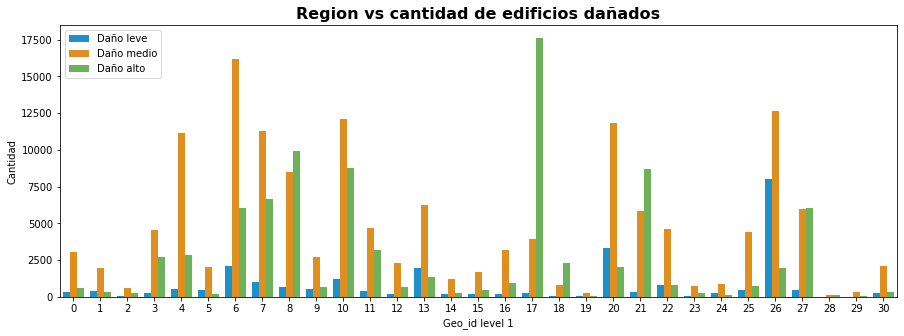

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x=join['geo_level_1_id'],hue=join['damage_grade'], palette=magic)
plt.title("Region vs cantidad de edificios dañados",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Geo_id level 1")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

In [63]:
aux1=normalizarDamage(join.groupby(['damage_grade','geo_level_1_id']).count().pivot_table(index='geo_level_1_id',columns="damage_grade",values="building_id").fillna(0)).reset_index()[3].to_frame().sort_index()
df_checkout = aux1

labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
angles = [i / float(31) * 2 * pi for i in range(31)]
angles += angles[:1]  

gray = '#999999'
black = '#000000'

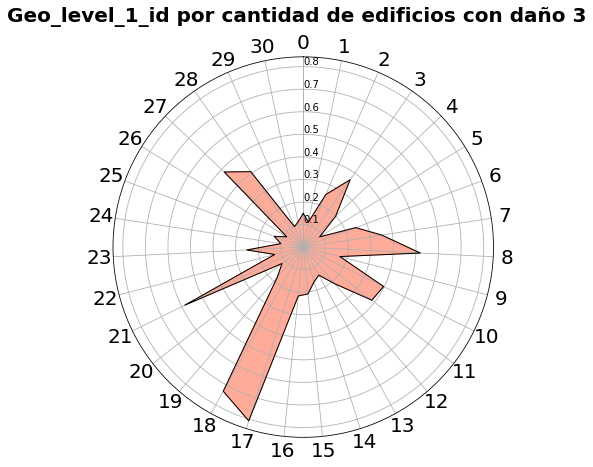

In [64]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Geo_level_1_id por cantidad de edificios con daño 3', fontsize=20,fontweight='bold')

series = plt.subplot(1, 1, 1, polar=True)
    
series.set_theta_offset(pi / 2)
series.set_theta_direction(-1)

plt.xticks(angles, labels, color=black, size=20)

series_values = df_checkout.values.flatten().tolist()
series_values += series_values[:1]  

series.set_rlabel_position(0)
series.plot(angles, series_values, color=black, linestyle='solid', linewidth=1)
series.fill(angles, series_values, color=red, alpha=0.4)
#series.set_title('Geo_level_1_id por cantidad de edificios con daño 3', y=1)

De este grafico determino el epicentro

In [65]:
epicentro = join.loc[(join['geo_level_1_id'] == 17) | (join['geo_level_1_id'] == 18) | (join['geo_level_1_id'] == 21)]

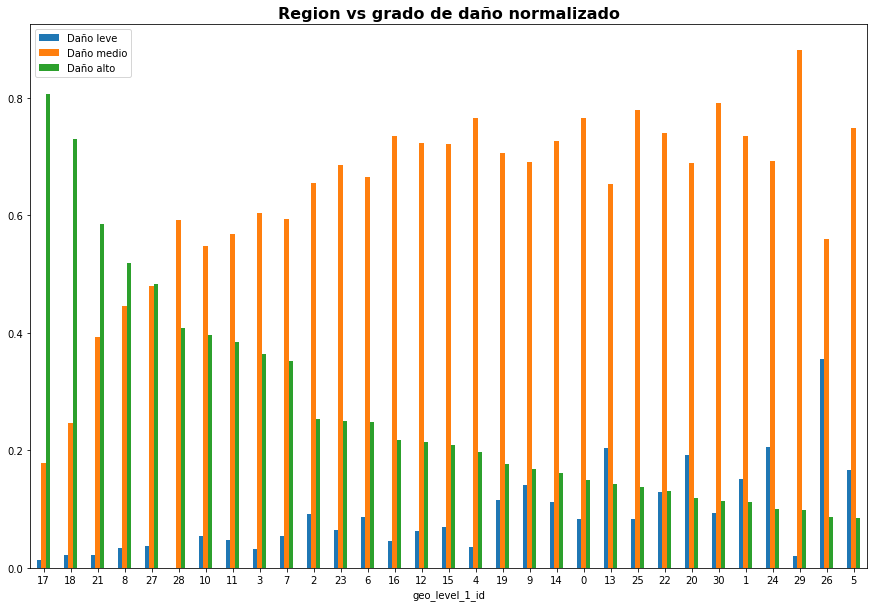

In [66]:
plot = normalizarDamage(join.groupby(['damage_grade','geo_level_1_id']).count().pivot_table(index='geo_level_1_id',columns="damage_grade",values="building_id").fillna(0)).sort_values(3, ascending=False).plot(kind='bar',title='Region vs grado de daño normalizado',figsize=(15,10), rot=0)
plt.title('Region vs grado de daño normalizado',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## Destruccion por material en todo el territorio

### Uso de materiales y grado de daño de edificios que los usaron

Se hace este analisis partiendo de la hipotesis que el grado daño estaria condicionado por el tipo de material que se uso en la construccion de los edificios

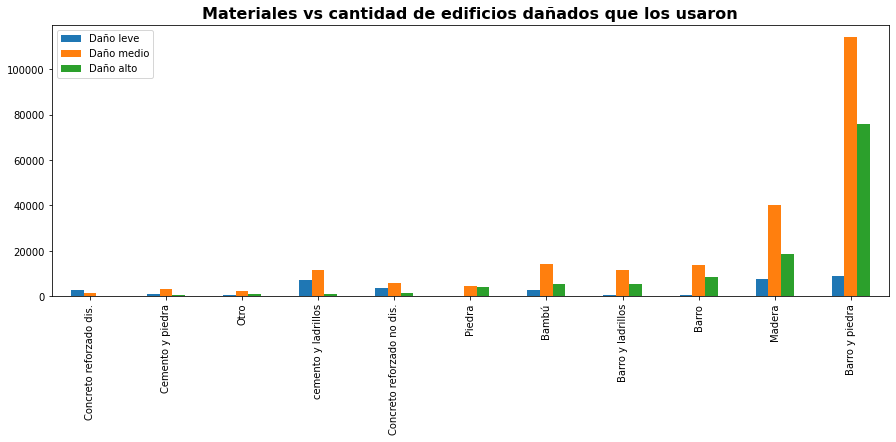

In [67]:
df = train_values[materials_with_building_id].merge(train_labels).groupby(['damage_grade'])[materials].sum().T.sort_values(3)
df.index = ['Concreto reforzado dis.','Cemento y piedra', 'Otro','cemento y ladrillos','Concreto reforzado no dis.', 'Piedra','Bambú', 'Barro y ladrillos','Barro', 'Madera','Barro y piedra']
plot = df.plot(kind='bar',title='Materiales vs cantidad de edificios dañados que los usaron', figsize=(15,5))
plt.title('Materiales vs cantidad de edificios dañados que los usaron',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

El graficos normalizado de materiales segun grado de daño

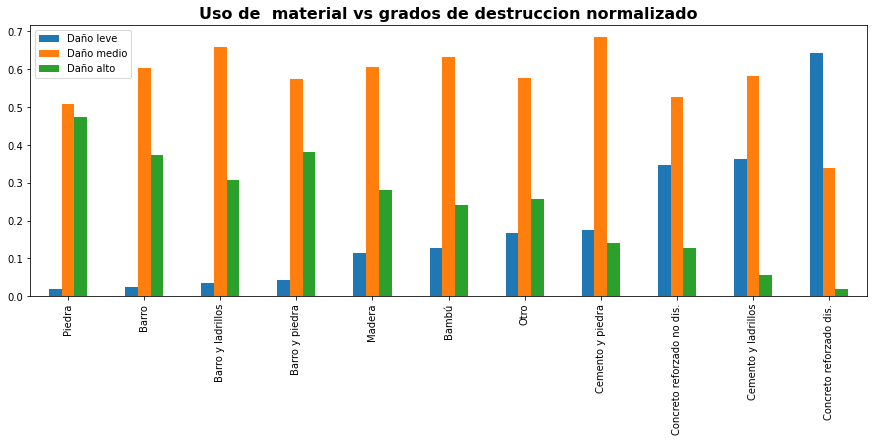

In [68]:
df=normalizarDamage(train_values[materials_with_building_id].merge(train_labels).groupby(['damage_grade'])[materials].sum().T)
df.index = ['Barro', 'Barro y piedra','Piedra','Cemento y piedra','Barro y ladrillos','Cemento y ladrillos', 'Madera','Bambú', 'Concreto reforzado no dis.','Concreto reforzado dis.', 'Otro']
plot = df.sort_values(1).plot(kind='bar',title='Uso de  material vs grados de destruccion normalizado',figsize=(15,5))
plt.title('Uso de  material vs grados de destruccion normalizado',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

### Destruccion por material en el epicentro

Se hace este analisis partiendo de la hipotisis de que, mientras mas cerca del epicientro, el edificio, que fue construido con los peores materiales recibieron mayores daños.

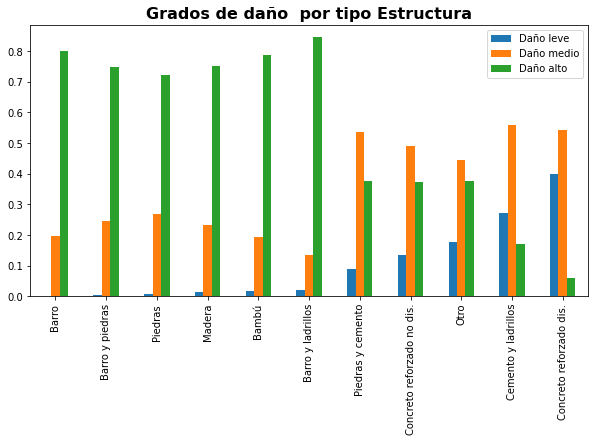

In [69]:
df=normalizarDamage(epicentro[materials_with_building_id].merge(train_labels).groupby(['damage_grade'])[materials].sum().T)
df.index = ['Barro', 'Barro y piedras','Piedras','Piedras y cemento','Barro y ladrillos','Cemento y ladrillos', 'Madera','Bambú', 'Concreto reforzado no dis.','Concreto reforzado dis.', 'Otro']
plot = df.sort_values(1).plot(kind='bar',title='Grados de daño  por tipo Estructura ',figsize=(10,5))
plt.title('Grados de daño  por tipo Estructura',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## ¿Cual fue el mejor y peor techo?

Este analisis inicial se hace para ver como esta distribuido el grado de daño en el edificio, dependiendo del tipo de techo que se construyo en e edificio.

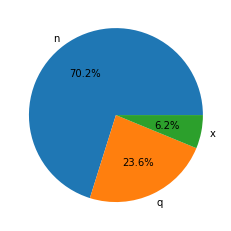

In [70]:
nombres = ['n','q','x']
plt.pie(join['roof_type'].value_counts(), labels=nombres, autopct='%1.1f%%')
plt.show()

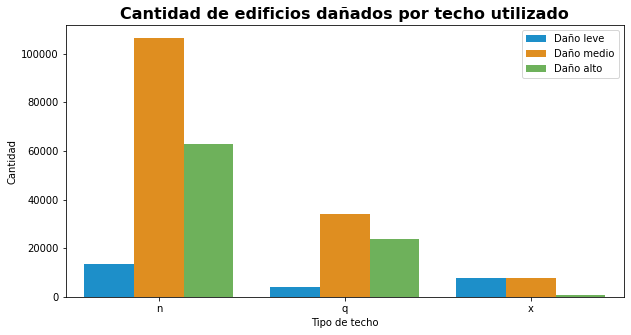

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x=join['roof_type'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios dañados por techo utilizado",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Tipo de techo")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

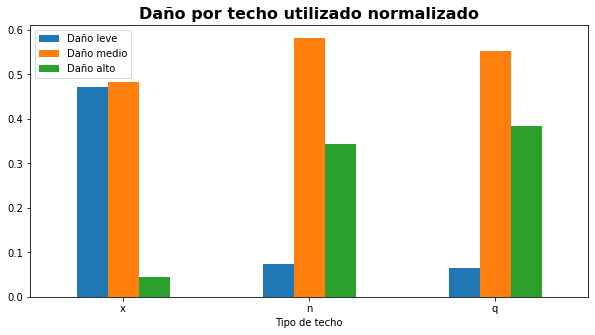

In [72]:
plot = normalizarDamage(join[['roof_type','damage_grade','building_id']].groupby(['damage_grade','roof_type'])\
                        .count().pivot_table(index='roof_type',columns="damage_grade",values="building_id").fillna(0)).sort_values(1, ascending=False).plot(kind='bar',title='Daño por techo utilizado normalizado',figsize=(10,5),rot=0, xlabel='Tipo de techo')
plt.title('Daño por techo utilizado normalizado',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

In [73]:
x=join[["roof_type","geo_level_1_id","damage_grade"]]
x=x.pivot_table(index="geo_level_1_id",columns="roof_type",values="damage_grade",aggfunc="mean").fillna(0)

Text(0.5, 66.5, 'Tipo de Techo')

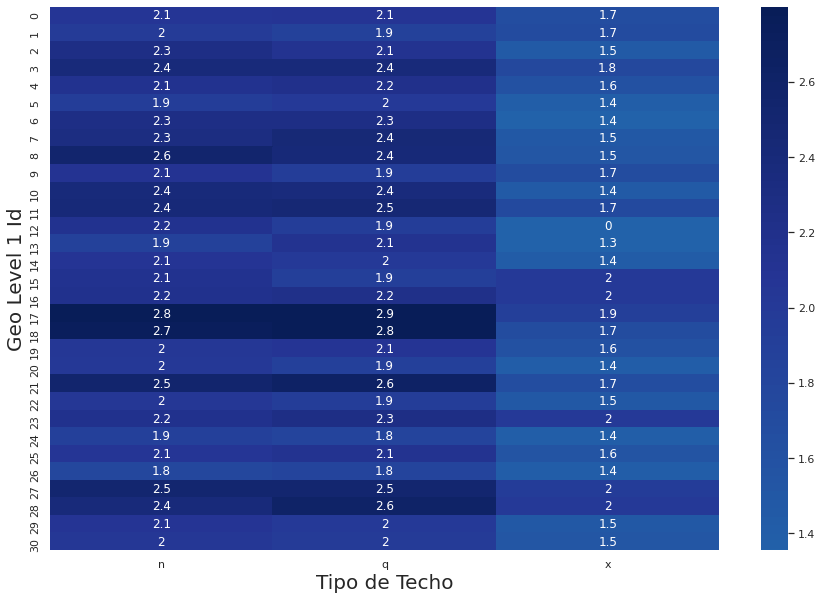

In [74]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(x, cmap="YlGnBu", center=0,robust=True, annot=True)
plt.ylabel("Geo Level 1 Id",fontsize=20)
plt.xlabel("Tipo de Techo",fontsize=20)

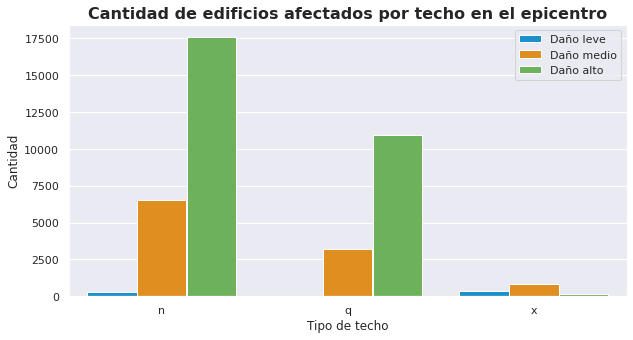

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x=epicentro['roof_type'],hue=epicentro['damage_grade'], palette=magic)
plt.title("Cantidad de edificios afectados por techo en el epicentro",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Tipo de techo")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

Crear torta de N,Q y X en el epicentro

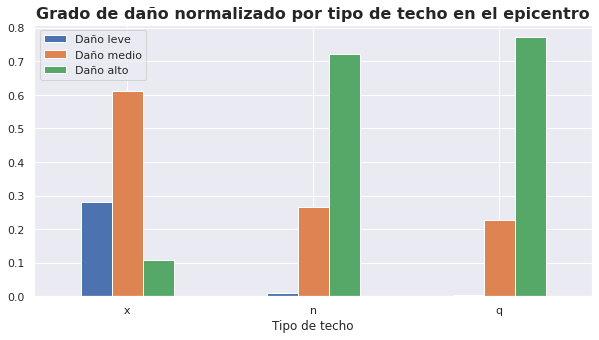

In [76]:
plot = normalizarDamage(epicentro[['roof_type','damage_grade','building_id']].\
                        groupby(['damage_grade','roof_type']).count().pivot_table(index='roof_type',columns="damage_grade",values="building_id")\
                        .fillna(0)).sort_values(1, ascending=False).plot(kind='bar',title='Grado de daño normalizado por tipo de techo en el epicentro', figsize=(10,5), rot=0, xlabel='Tipo de techo')
plt.title('Grado de daño normalizado por tipo de techo en el epicentro',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## ¿Cual fue el mejor y peor tipo de cimientos?

Este análisis se realiza, partiendo de la hipotesis que el grado de daño que recibe el edificio esta reflejado en tipo de cimiento sobre el cual el edificio este construido y que esto tambien tara afectado, por la distancia que tengan los edicios del epicentro.

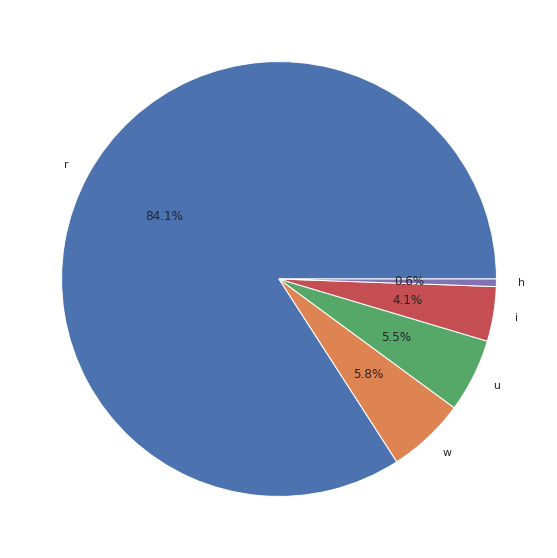

In [77]:
nombres = ['r','w','u','i','h']
plt.pie(join['foundation_type'].value_counts(), labels=nombres, autopct='%1.1f%%')
plt.show()

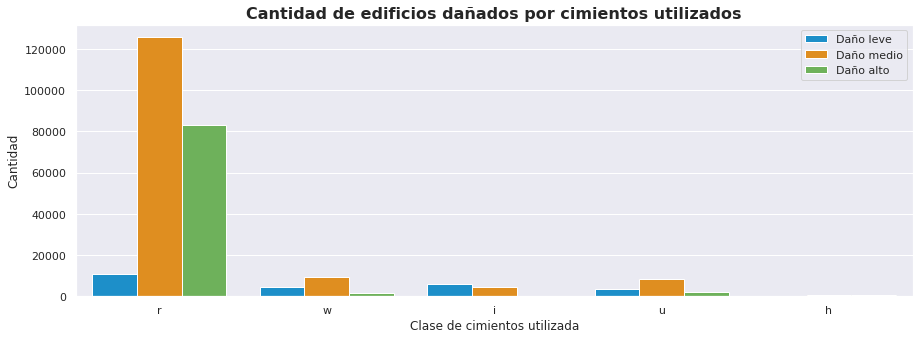

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(x=join['foundation_type'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios dañados por cimientos utilizados",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Clase de cimientos utilizada")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

Hacer torta de cantidades de las cantidades

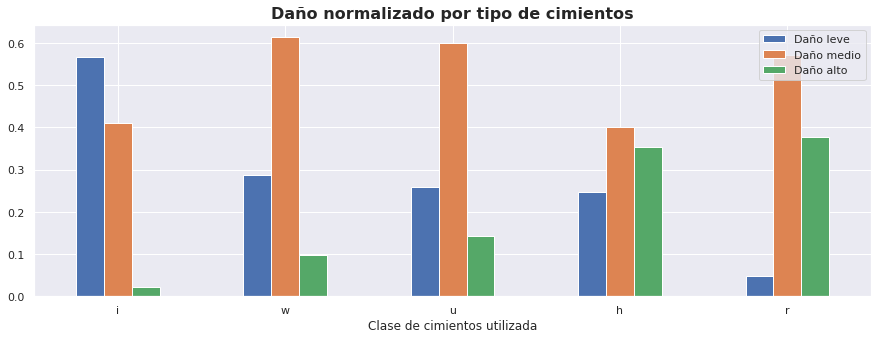

In [79]:
plot = normalizarDamage(join[['foundation_type','damage_grade','building_id']].groupby(['damage_grade','foundation_type']).count().\
                        pivot_table(index='foundation_type',columns="damage_grade",values="building_id").fillna(0)).\
                        sort_values(1, ascending=False).plot(kind='bar',title='Daño normalizado por tipo de cimientos',figsize=(15,5),rot=0, xlabel='Clase de cimientos utilizada')
plt.title('Daño normalizado por tipo de cimientos',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

Cimientos en el epicentro


Hacer un torta de cantidades

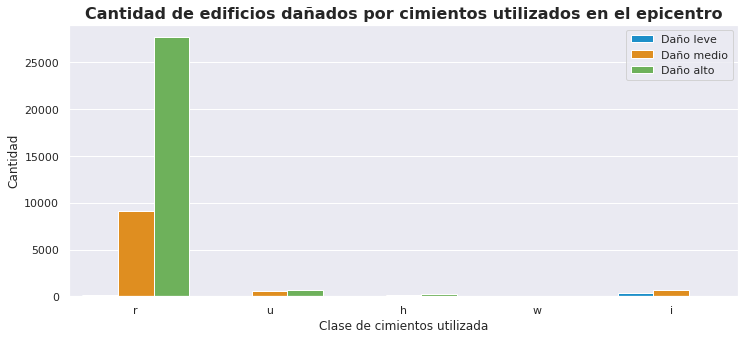

In [80]:
plt.figure(figsize=(12,5))
sns.countplot(x=epicentro['foundation_type'],hue=epicentro['damage_grade'], palette=magic)
plt.title("Cantidad de edificios dañados por cimientos utilizados en el epicentro",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Clase de cimientos utilizada")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

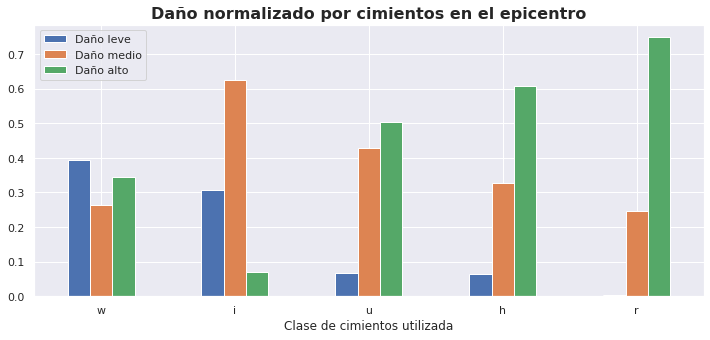

In [81]:
plot = normalizarDamage(epicentro[['foundation_type','damage_grade','building_id']].groupby(['damage_grade','foundation_type']).count().\
                        pivot_table(index='foundation_type',columns="damage_grade",values="building_id").fillna(0)).sort_values(1, ascending=False)\
                        .plot(kind='bar',title='Daño normalizado por cimientos en el epicentro',figsize=(12,5), rot=0, xlabel='Clase de cimientos utilizada')
plt.title('Daño normalizado por cimientos en el epicentro',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## ¿Cual fue el mejor y peor tipo de forma de contruccion?

Este análisis se hace con el objetivo de determinar la peor forma de construcción de un edificio, y poder decir que mientras mas cerca ,estos tipos de edicios , esten del epicentro el daño sera mayor.

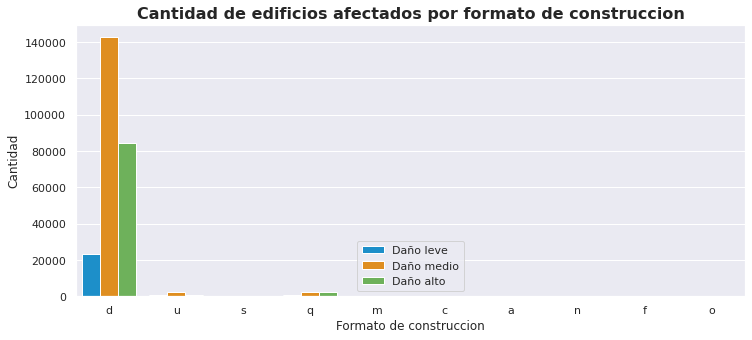

In [82]:
plt.figure(figsize=(12,5))
sns.countplot(x=join['plan_configuration'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios afectados por formato de construccion",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Formato de construccion")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

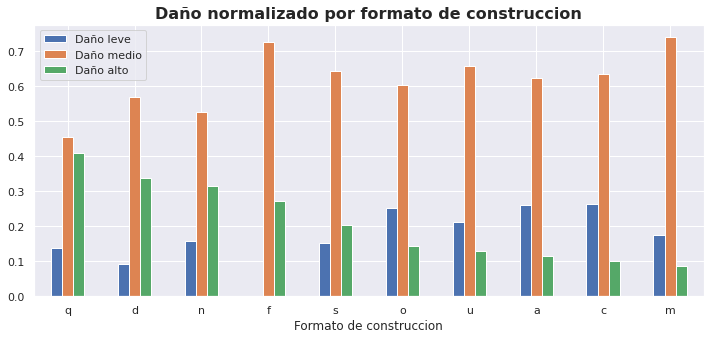

In [83]:
plot = normalizarDamage(join[['plan_configuration','damage_grade','building_id']].groupby(['damage_grade','plan_configuration']).count()\
                        .pivot_table(index='plan_configuration',columns="damage_grade",values="building_id").fillna(0)).sort_values(3, ascending=False)\
                        .plot(kind='bar',title='Daño normalizado por formato de construccion',figsize=(12,5),rot=0, xlabel='Formato de construccion')
plt.title('Daño normalizado por formato de construccion',fontsize=16,fontweight='bold')

plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

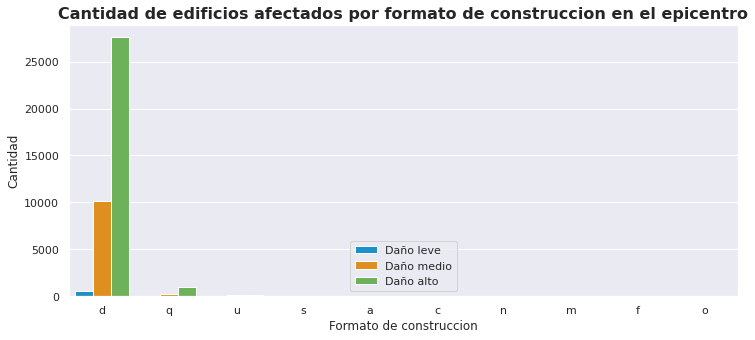

In [84]:
plt.figure(figsize=(12,5))
sns.countplot(x=epicentro['plan_configuration'],hue=epicentro['damage_grade'], palette=magic)
plt.title("Cantidad de edificios afectados por formato de construccion en el epicentro",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Formato de construccion")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

Text(0.5, 1.0, 'Daño normalizado por formato de contruccion en el epicentro')

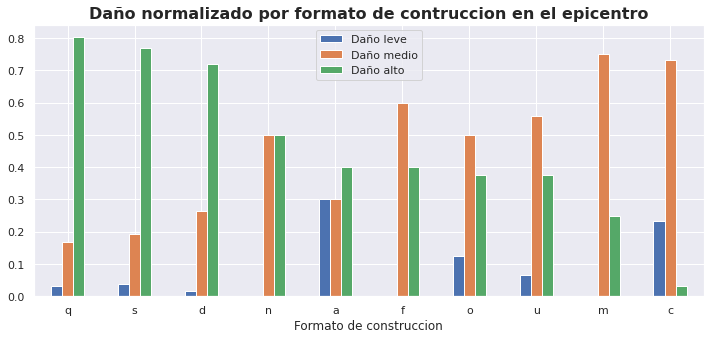

In [85]:
plot = normalizarDamage(epicentro[['plan_configuration','damage_grade','building_id']].groupby(['damage_grade','plan_configuration']).\
                        count().pivot_table(index='plan_configuration',columns="damage_grade",values="building_id").fillna(0)).\
                        sort_values(3, ascending=False).plot(kind='bar',title='Daño normalizado por formato de contruccion en el epicentro',figsize=(12,5),rot=0, xlabel='Formato de construccion')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])
plt.title('Daño normalizado por formato de contruccion en el epicentro',fontsize=16,fontweight='bold')

## Familias afectadas por usar un material malo y mejora posible

Este análisis se hace, para poder hacer una posterior recomendación a futuras familias hacerca del tipo de materia que empleen en las contruccoiones de sus casas.

In [86]:
df_tipos=join.groupby(['damage_grade'])[materials].sum().T
df_tipos_normalizados=normalizarDamage(df_tipos.copy())
df_tipos_normalizados=df_tipos_normalizados.sort_values(1)
df_peores_tipos=df_tipos_normalizados.nsmallest(3,columns=1)
df_mejores_tipos=df_tipos_normalizados.nlargest(3,columns=1)

In [87]:
df_mejores_tipos.index

Index(['has_superstructure_rc_engineered',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_rc_non_engineered'],
      dtype='object')

In [88]:
df_peores_tipos.index

Index(['has_superstructure_stone_flag', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_brick'],
      dtype='object')

Text(0.5, 1.0, 'Cantidad de familias afectadas por grado de daño')

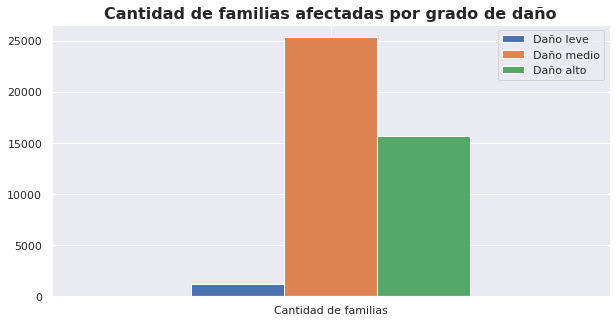

In [89]:
df_peores_contruciones=join.loc[(join['has_superstructure_stone_flag']==1) | (join['has_superstructure_adobe_mud']==1) | (join['has_superstructure_mud_mortar_brick']==1) ]
cant_familias_damnificadas=df_peores_contruciones['count_families'].sum()
df_peores_contruciones=df_peores_contruciones[['damage_grade','count_families']].groupby('damage_grade').sum().T
df_peores_contruciones.index = ['Cantidad de familias']
plot = df_peores_contruciones.plot(kind='bar',title='Cantidad de familias afectadas por grado de daño',figsize=(10,5), rot=0)
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])
plt.title('Cantidad de familias afectadas por grado de daño',fontsize=16,fontweight='bold')

In [90]:
cant_familias_damnificadas

42117

In [91]:
#Cantidad de familias por grado
df_peores_contruciones

damage_grade,1,2,3
Cantidad de familias,1183,25305,15629


In [92]:
df_mejores_contruciones=join.loc[(join['has_superstructure_rc_engineered']==1) | (join['has_superstructure_cement_mortar_brick']==1) | (join['has_superstructure_rc_non_engineered']==1) ]
df_mejores_tipos_nor=normalizarDamage(df_mejores_contruciones[['damage_grade','count_families']].groupby('damage_grade').sum().T)

In [93]:
df_mejores_tipos_nor

damage_grade,1,2,3
count_families,0.361072,0.55612,0.082808


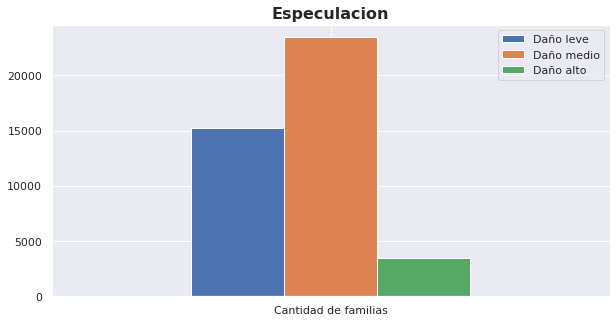

In [94]:
estimacion_de_daño_en_los_mejores_materiales= df_mejores_tipos_nor.loc[:,:]*cant_familias_damnificadas
estimacion_de_daño_en_los_mejores_materiales.index = ['Cantidad de familias']
plot = estimacion_de_daño_en_los_mejores_materiales.plot(kind='bar',title='Especulacion ',figsize=(10,5), rot=0)
plt.title('Especulacion',fontsize=16,fontweight='bold')

plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

In [95]:
#Cantidades de familias por grado (estimacion)
estimacion_de_daño_en_los_mejores_materiales

damage_grade,1,2,3
Cantidad de familias,15207.280754,23422.113912,3487.605334


Se pasa de 15629 familias afectadas por daños severos en sus viviendas a 3488, una reduccion de aproximadamente el 78%

## ¿Determina algo la condicion de superficie del terreno?

Es analis se plantea bajo la hipotesis, de que el grado de daño del edificio estara determinado por la condicion de la superficie sobre la cual el edificio esta construido.

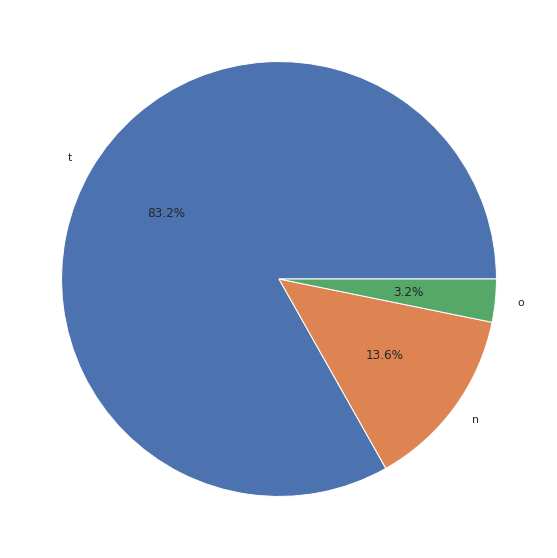

In [96]:
nombres = ['t','n','o']
plt.pie(join['land_surface_condition'].value_counts(), labels=nombres, autopct='%1.1f%%')
plt.show()

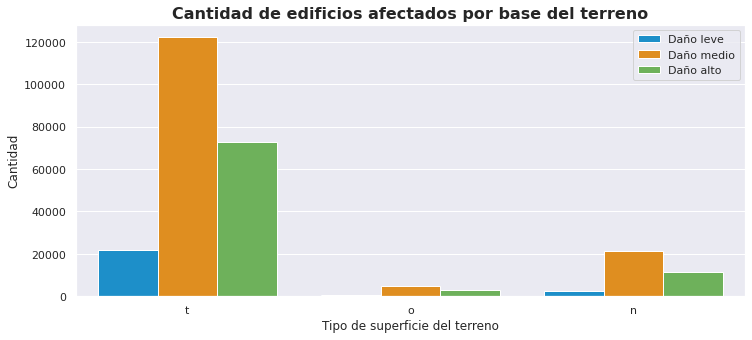

In [97]:
plt.figure(figsize=(12,5))
sns.countplot(x=join['land_surface_condition'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios afectados por base del terreno",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Tipo de superficie del terreno")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

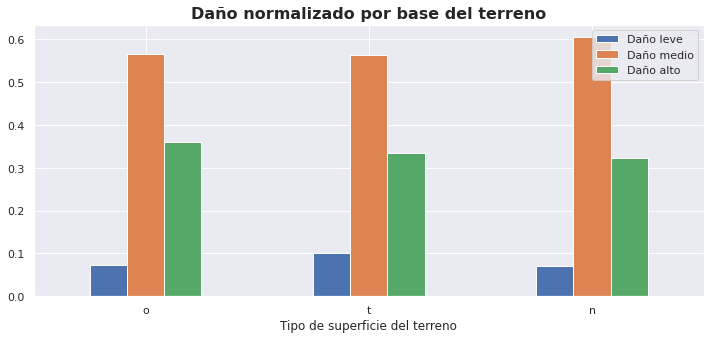

In [98]:
plot = normalizarDamage(join[['land_surface_condition','damage_grade','building_id']].groupby(['damage_grade','land_surface_condition']).count()\
                        .pivot_table(index='land_surface_condition',columns="damage_grade",values="building_id").fillna(0)).sort_values(3, ascending=False).\
                        plot(kind='bar',title='Daño normalizado por base del terreno',figsize=(12,5),rot=0, xlabel='Tipo de superficie del terreno')
plt.title('Daño normalizado por base del terreno',fontsize=16,fontweight='bold')

plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## ¿Es determinante el tipo de construccion de la primer planta?

Este analisis se hace planteando la hipotesis de que el grado de daño del edificio estara determinado tambien por el tipo de construccion en el primer piso.

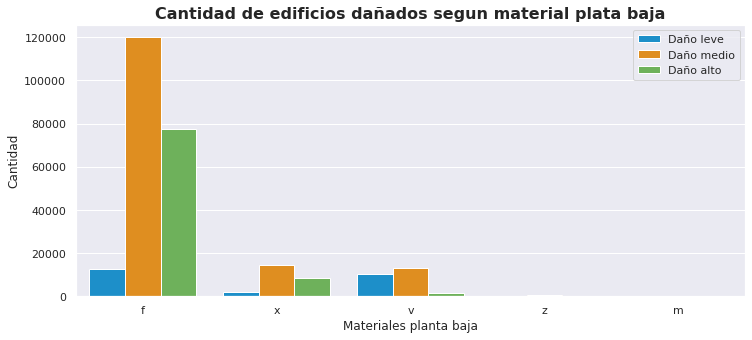

In [99]:
plt.figure(figsize=(12,5))
sns.countplot(x=join['ground_floor_type'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios dañados segun material plata baja",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Materiales planta baja")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

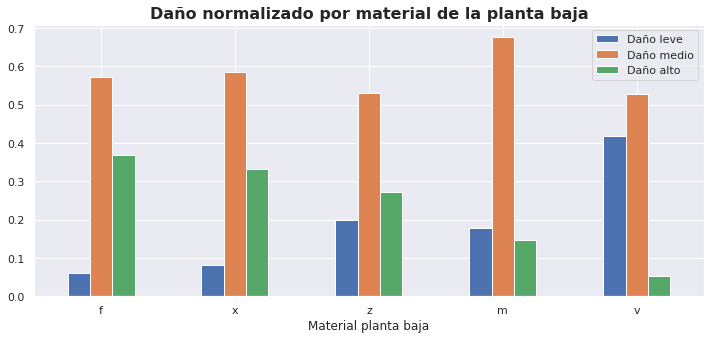

In [100]:
plot = normalizarDamage(join[['ground_floor_type','damage_grade','building_id']].groupby(['damage_grade','ground_floor_type']).count().pivot_table(index='ground_floor_type',columns="damage_grade",values="building_id").fillna(0)).sort_values(3, ascending=False).plot(kind='bar',title='Daño normalizado por material de la planta baja',figsize=(12,5),rot=0, xlabel='Material planta baja')
plt.title('Daño normalizado por material de la planta baja',fontsize=16,fontweight='bold')

plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## Analizamos como fueron afectados los edificios por su estado legal

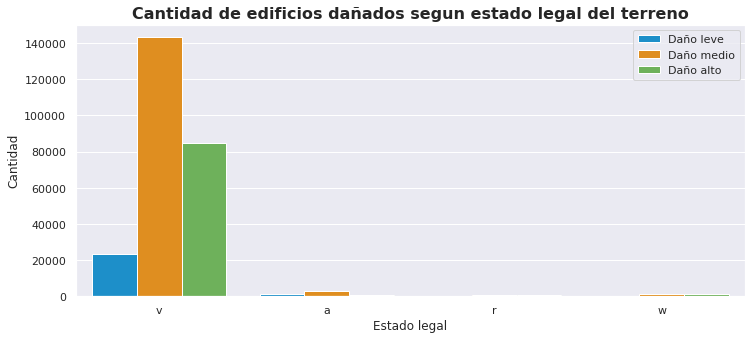

In [101]:
plt.figure(figsize=(12,5))
sns.countplot(x=join['legal_ownership_status'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios dañados segun estado legal del terreno",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Estado legal")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

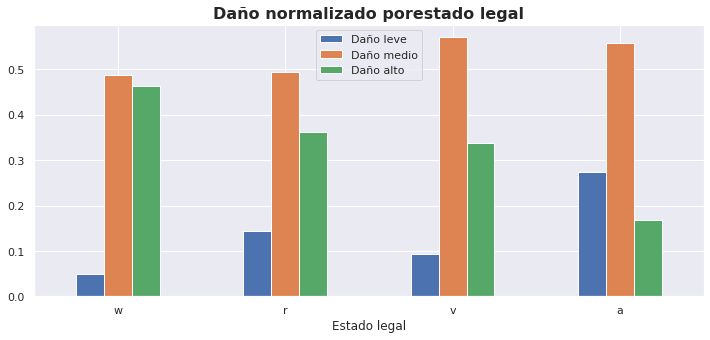

In [102]:
plot = normalizarDamage(join[['legal_ownership_status','damage_grade','building_id']].groupby(['damage_grade','legal_ownership_status']).count().pivot_table(index='legal_ownership_status',columns="damage_grade",values="building_id").fillna(0)).sort_values(3, ascending=False).plot(kind='bar',title='Daño normalizado por estado legal del terreno',figsize=(12,5),rot=0, xlabel='Estado legal')
plt.title('Daño normalizado porestado legal',fontsize=16,fontweight='bold')

plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## ¿La orientacion del edificio afecta a la proporcion de daños?

Este analisis se hace bajo la hipotesis de que el daño del edificio, estara correlacionado con la orientacion que este posea.

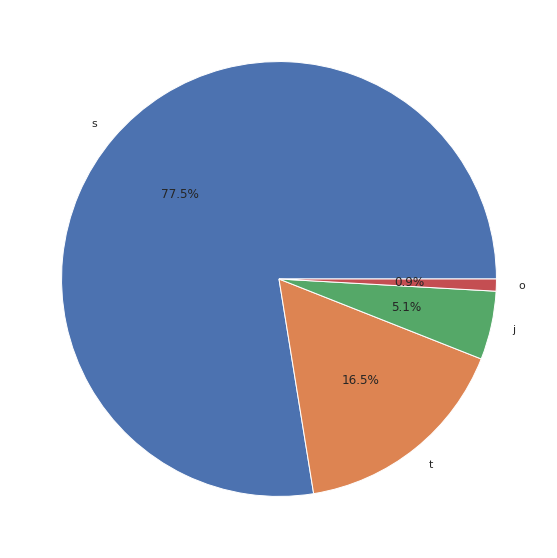

In [103]:
nombres = ['s','t','j','o']
plt.pie(join['position'].value_counts(), labels=nombres, autopct='%1.1f%%')
plt.show()

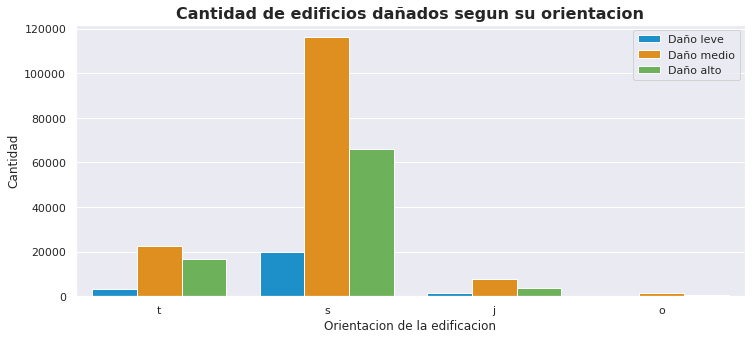

In [104]:
plt.figure(figsize=(12,5))
sns.countplot(x=join['position'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios dañados segun su orientacion",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Orientacion de la edificacion")
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

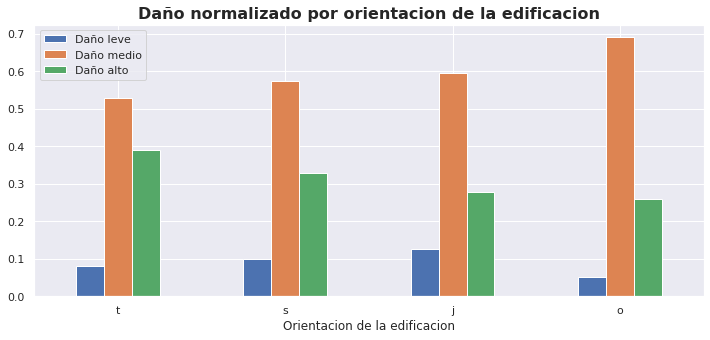

In [105]:
plot = normalizarDamage(join[['position','damage_grade','building_id']].groupby(['damage_grade','position']).count().\
                        pivot_table(index='position',columns="damage_grade",values="building_id").fillna(0)).sort_values(3, ascending=False).\
                        plot(kind='bar',title='Daño normalizado por orientacion de la edificacion',figsize=(12,5),rot=0, xlabel='Orientacion de la edificacion')
plt.title('Daño normalizado por orientacion de la edificacion',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])

## ¿Los materiales de los pisos que no son ni el primero ni el techo afectan al daño recibido por la estructura?

Este analisis se realiza para ver si el daño estara relacionado con los materiales que se emplearón en el rest de los pisos del edificio.

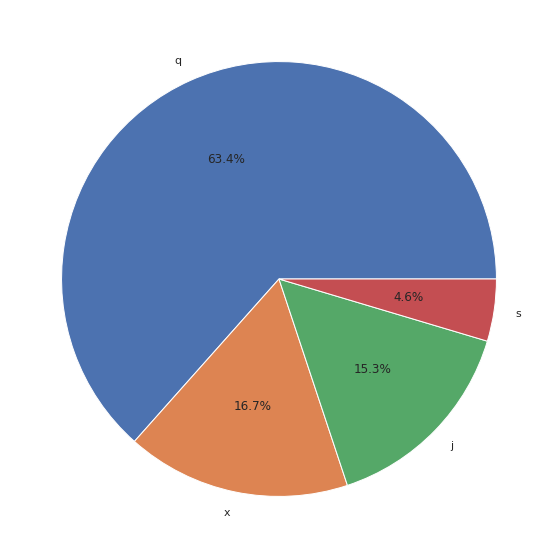

In [106]:
nombres = ['q','x','j','s']
plt.pie(join['other_floor_type'].value_counts(), labels=nombres, autopct='%1.1f%%')
plt.show()

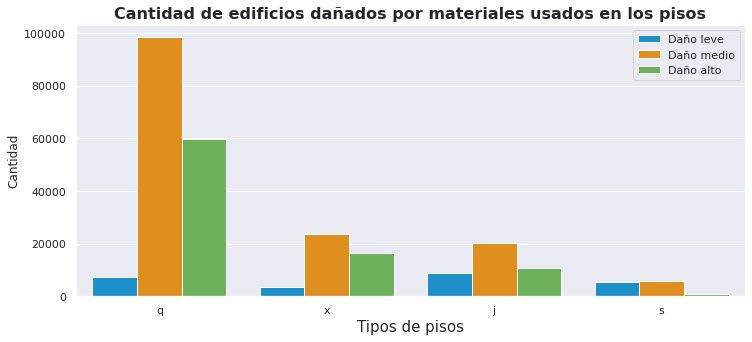

In [107]:
plt.figure(figsize=(12,5))
sns.countplot(x=join['other_floor_type'],hue=join['damage_grade'], palette=magic)
plt.title("Cantidad de edificios dañados por materiales usados en los pisos",fontsize=16,fontweight='bold')
plt.ylabel("Cantidad")
plt.xlabel("Tipos de pisos",fontsize=15)
plt.legend(["Daño leve","Daño medio","Daño alto"])
plt.show()

Text(0.5, 0, 'Tipos de Pisos')

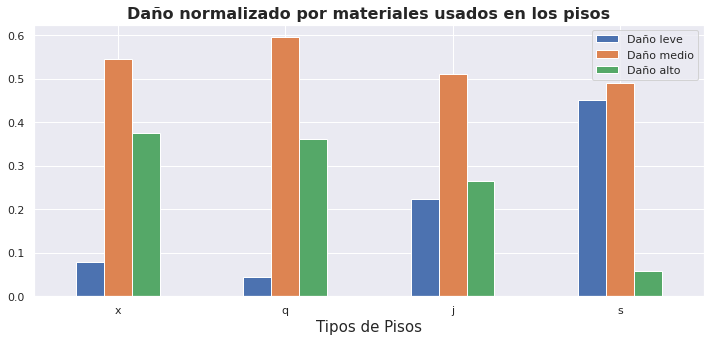

In [108]:
plot = normalizarDamage(join[['other_floor_type','damage_grade','building_id']].groupby(['damage_grade','other_floor_type']).count().\
                        pivot_table(index='other_floor_type',columns="damage_grade",values="building_id").fillna(0)).sort_values(3, ascending=False).\
                        plot(kind='bar',title='Daño normalizado por materiales usados en los pisos',figsize=(12,5),rot=0, xlabel='Tipos de pisos')
plt.title('Daño normalizado por materiales usados en los pisos',fontsize=16,fontweight='bold')
plot.legend(['Daño leve', 'Daño medio', 'Daño alto'])
plt.xlabel("Tipos de Pisos",fontsize=15) 

## Mapa de calor de porcentaje de altura vs pisos con grado de daño

Este analisis se hace, partiendo de la hiposis de que el grado de daño estara relacionado, por altura que el edificio ocupa la cantidad de pisos que se construyo sobre este.

In [109]:
x=join[["height_percentage","count_floors_pre_eq","damage_grade"]]
x = x[x['count_floors_pre_eq']<8]
x=x.pivot_table(index="height_percentage",columns="count_floors_pre_eq",values="damage_grade",aggfunc="mean").fillna(0)

Text(111.5, 0.5, 'Cantidad de Pisos')

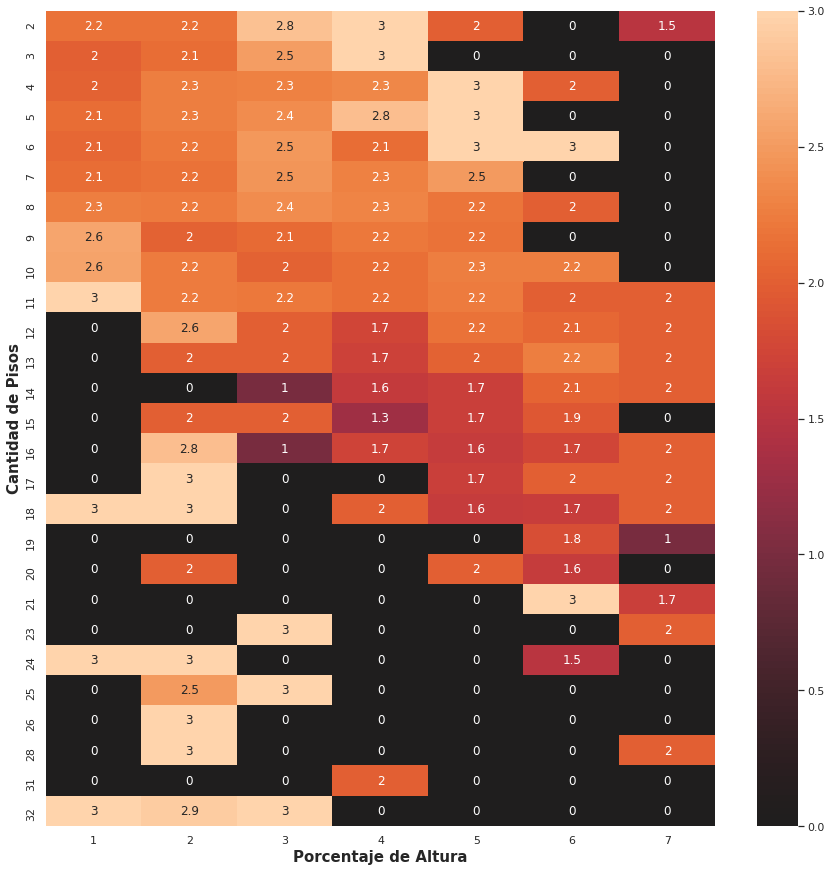

In [110]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(x, center=0, annot=True)
plt.xlabel("Porcentaje de Altura",fontsize=15,fontweight='bold') 
plt.ylabel("Cantidad de Pisos",fontsize=15,fontweight='bold') 

## Mapa de calor de altura porcentage vs area ocupada con daño

Este analisis se hace, partiendo de la hipitesis en donde el grado de daño estara determinado por el area que ocupa el edificio y el porcentaje de altura que este posee.

In [111]:
x=join[["area_percentage","count_floors_pre_eq","damage_grade",'height_percentage']]
x = x[x['count_floors_pre_eq']<8]
x=x.pivot_table(index="area_percentage",columns="height_percentage",values="damage_grade",aggfunc="mean")

Text(111.5, 0.5, 'Area Porcentual')

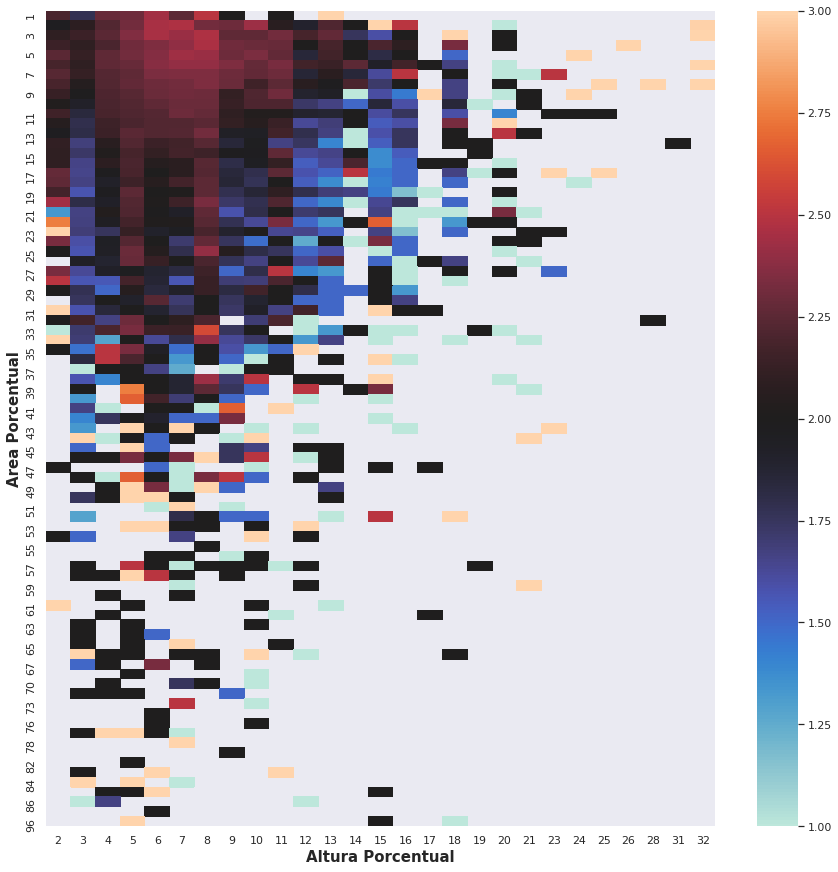

In [112]:
sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(x, center=2)
plt.xlabel("Altura Porcentual",fontsize=15,fontweight='bold') 
plt.ylabel("Area Porcentual",fontsize=15,fontweight='bold') 

## Busqueda de la "altura recomendada" por piso

Este analisis se realiza con el objetivo de indicar/recomendar a distintos entes, el porcentaje de altura recomendado para un determinado piso, con la finalidad de asi evitar graves daños en los edificios.

In [113]:
pisos_alturaPromedio_daño=join[['damage_grade','count_floors_pre_eq','height_percentage']].groupby(['damage_grade','count_floors_pre_eq'])['height_percentage'].mean().reset_index().pivot_table(index='count_floors_pre_eq',columns="damage_grade").fillna(0)
pisos_alturaPromedio_daño

height_percentage                      
damage_grade                        1          2          3
count_floors_pre_eq                                        
1                            3.081391   3.017117   3.017238
2                            5.370206   5.258120   5.226599
3                            8.227040   6.939745   6.881509
4                           11.776521   9.450504   9.171258
5                           14.566929  11.191762  10.894325
6                           18.207547  14.834586  15.826087
7                           19.000000  18.080000  21.250000
8                            0.000000  26.000000   0.000000
9                            5.000000   0.000000   0.000000

In [114]:
join[(join['count_floors_pre_eq']>7)]['building_id'].count()

2

In [115]:
pisos_alturaPromedio_daño=join[(join['count_floors_pre_eq']<8)][['damage_grade','count_floors_pre_eq',\
'height_percentage']].groupby(['damage_grade','count_floors_pre_eq'])['height_percentage'].mean().reset_index()

In [116]:
pisos_alturaPromedio_daño['height_percentage']=pisos_alturaPromedio_daño['height_percentage']/pisos_alturaPromedio_daño['count_floors_pre_eq']

Text(0.5, 0, 'Cantidad de Pisos')

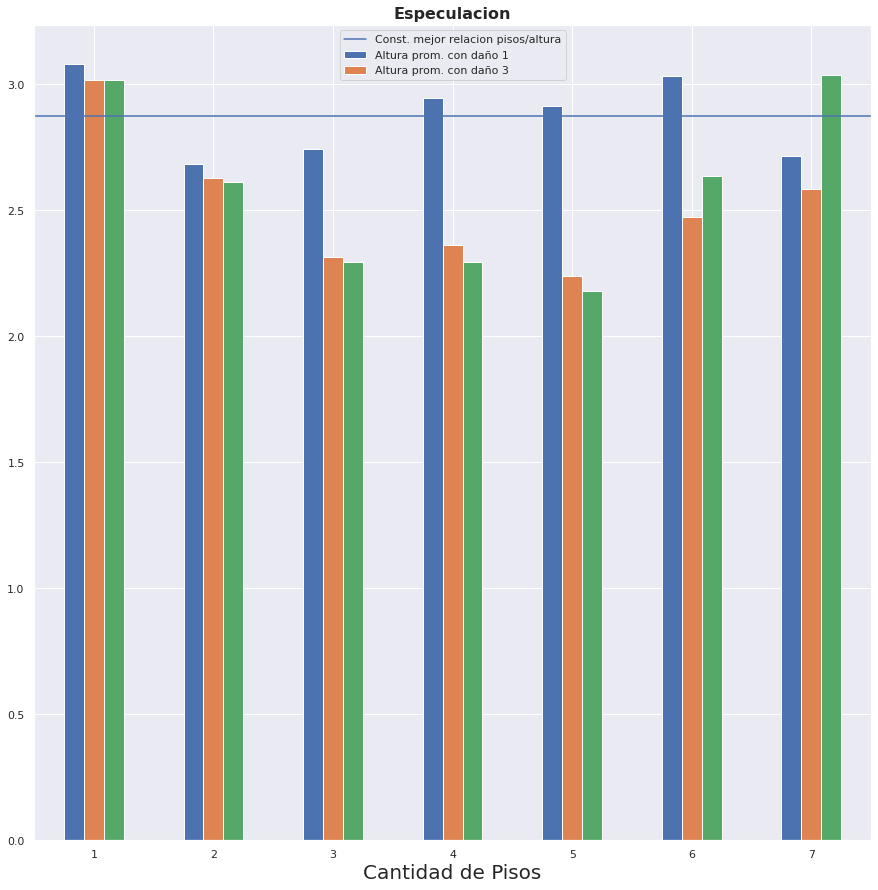

In [117]:
pisos_alturaPromedio_daño=join[(join['count_floors_pre_eq']<8)][['damage_grade','count_floors_pre_eq',\
'height_percentage']].groupby(['damage_grade','count_floors_pre_eq'])['height_percentage'].mean().reset_index()
pisos_alturaPromedio_daño['height_percentage']=pisos_alturaPromedio_daño['height_percentage']/pisos_alturaPromedio_daño['count_floors_pre_eq']
pisos_alturaPromedio_daño=pisos_alturaPromedio_daño.pivot_table(index='count_floors_pre_eq',columns="damage_grade").fillna(0)
pisos_alturaPromedio_daño.plot(kind='bar',title='Especulacion ',figsize=(15,15),rot=0).axhline(y=pisos_alturaPromedio_daño['height_percentage'].mean()[1])
plt.title('Especulacion',fontsize=16,fontweight='bold')
plt.legend(['Const. mejor relacion pisos/altura','Altura prom. con daño 1 ','Altura prom. con daño 3'])
plt.xlabel("Cantidad de Pisos",fontsize=20) 

In [118]:
pisos_alturaPromedio_daño['height_percentage'].mean()

damage_grade
1    2.873605
2    2.516527
3    2.581350
dtype: float64